# CSE 572 - Data Mining

## Homework - 3

### Name : Shivam Hasmukh Panchal
### ASU ID : 1229664308

### Task - 2

In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162733 sha256=fc303bea25d1ce03957cd69222a8005197722fd133b2161968c512df531e20fb
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [2]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, KNNBasic, KNNWithMeans
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
import matplotlib.pyplot as plt
from surprise.accuracy import rmse, mae
from sklearn.metrics import accuracy_score
from surprise import accuracy
ratings_data = pd.read_csv("/content/ratings_small.csv", dtype=str)

ratings_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


# Part 3C

In [3]:
ratings_data['movieId'] = ratings_data['movieId'].astype(int)
ratings_data['userId'] = ratings_data['userId'].astype(int)
ratings_data['rating'] = ratings_data['rating'].astype(float)
print(ratings_data['rating'].dtype)
print(ratings_data['userId'].dtype)
print(ratings_data['movieId'].dtype)

float64
int64
int64


In [4]:
missing_columns = ratings_data.columns[ratings_data.isnull().any()]

# Replace missing values with 0.0
ratings_data[missing_columns] = ratings_data[missing_columns].fillna(0.0)

In [5]:
min_rating = ratings_data['rating'].min()
max_rating = ratings_data['rating'].max()

In [6]:
reader = Reader(rating_scale=(min_rating, max_rating))


In [7]:
surprise_model_dataset = Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']], reader)

In [8]:
pmf = SVD(biased=False) # PMF
user_cf = KNNBasic(sim_options={'user_based': True}) # User based collaborative filtering
item_cf = KNNBasic(sim_options={'user_based': False}) # Item based collaborative filtering

# PMF

In [9]:
pmf  = cross_validate(pmf, surprise_model_dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7799  0.7800  0.7868  0.7852  0.7770  0.7818  0.0037  
RMSE (testset)    1.0106  1.0147  1.0196  1.0231  1.0049  1.0146  0.0064  
Fit time          1.34    1.36    1.36    1.97    1.51    1.51    0.24    
Test time         0.09    0.20    0.10    0.29    0.09    0.15    0.08    


 ## User based Collaborative Filtering

In [10]:
user_cf  = cross_validate(user_cf, surprise_model_dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7397  0.7464  0.7411  0.7466  0.7442  0.7436  0.0028  
RMSE (testset)    0.9649  0.9735  0.9636  0.9708  0.9655  0.9677  0.0038  
Fit time          0.11    0.14    0.14    0.18    0.14    0.14    0.02    
Test time         2.36    1.36    1.46    2.17    1.46    1.76    0.42    


## Item based Collaborative Filtering

In [11]:
item_cf  = cross_validate(item_cf, surprise_model_dataset, measures=['MAE', 'RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7199  0.7111  0.7220  0.7284  0.7236  0.7210  0.0057  
RMSE (testset)    0.9335  0.9210  0.9363  0.9452  0.9389  0.9350  0.0080  
Fit time          3.75    3.72    6.52    6.22    5.29    5.10    1.18    
Test time         7.10    7.43    9.87    8.75    8.12    8.25    0.99    


# Part 3D

In [12]:
results = {
    'PMF': {
        'MAE': pmf['test_mae'].mean(),
        'RMSE': pmf['test_rmse'].mean()
    },
    'User-based CF': {
        'MAE': user_cf['test_mae'].mean(),
        'RMSE': user_cf['test_rmse'].mean()
    },
    'Item-based CF': {
        'MAE': item_cf['test_mae'].mean(),
        'RMSE': item_cf['test_rmse'].mean()
    }
}

In [13]:
results_df = pd.DataFrame(results)
results_df = results_df.T
results_df

,MAE,RMSE
PMF,0.781793,1.014591
User-based CF,0.743616,0.967660
Item-based CF,0.720991,0.934985


## Best models according to RMSE

In [14]:
results_df.sort_values(by=['RMSE'], ascending=True)

,MAE,RMSE
Item-based CF,0.720991,0.934985
User-based CF,0.743616,0.967660
PMF,0.781793,1.014591


## Best models according to MAE

In [15]:
results_df.sort_values(by=['MAE'], ascending=True)

,MAE,RMSE
Item-based CF,0.720991,0.934985
User-based CF,0.743616,0.967660
PMF,0.781793,1.014591


# Part 3E

In [16]:
train, test = train_test_split(surprise_model_dataset, test_size=0.25)

In [17]:
user_cf_cosine = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})
user_cf_msd = KNNWithMeans(k=50, sim_options={'name': 'msd', 'user_based': True})
user_cf_pearson = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': True})
user_cf_cosine.fit(train)
user_cf_msd.fit(train)
user_cf_pearson.fit(train)

print("\nCosine")
user_cf_cosine_mae = mae(user_cf_cosine.test(test))
user_cf_cosine_rmse = rmse(user_cf_cosine.test(test))

print("\nMSD")
user_cf_msd_mae = mae(user_cf_msd.test(test))
user_cf_msd_rmse = rmse(user_cf_msd.test(test))

print("\nPearson similarity")
user_cf_pearson_mae = mae(user_cf_pearson.test(test))
user_cf_pearson_rmse = rmse(user_cf_pearson.test(test))

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Cosine
MAE:  0.7030
RMSE: 0.9199

MSD
MAE:  0.6997
RMSE: 0.9164

Pearson similarity
MAE:  0.7022
RMSE: 0.9215


In [18]:
item_cf_cosine = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False, 'verbose': False})
item_cf_msd = KNNWithMeans(k=50, sim_options={'name': 'msd', 'user_based': False, 'verbose': False})
item_cf_pearson = KNNWithMeans(k=50, sim_options={'name': 'pearson', 'user_based': False, 'verbose': False})
item_cf_cosine.fit(train)
item_cf_msd.fit(train)
item_cf_pearson.fit(train)

print("\nCosine")
item_cf_cosine_mae = mae(item_cf_cosine.test(test))
item_cf_cosine_rmse = rmse(item_cf_cosine.test(test))

print("\nMSD")
item_cf_msd_mae = mae(item_cf_msd.test(test))
item_cf_msd_rmse = rmse(item_cf_msd.test(test))

print("\nPearson similarity")
item_cf_pearson_mae = mae(item_cf_pearson.test(test))
item_cf_pearson_rmse = rmse(item_cf_pearson.test(test))

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Cosine
MAE:  0.7070
RMSE: 0.9239

MSD
MAE:  0.6967
RMSE: 0.9107

Pearson similarity
MAE:  0.7039
RMSE: 0.9258


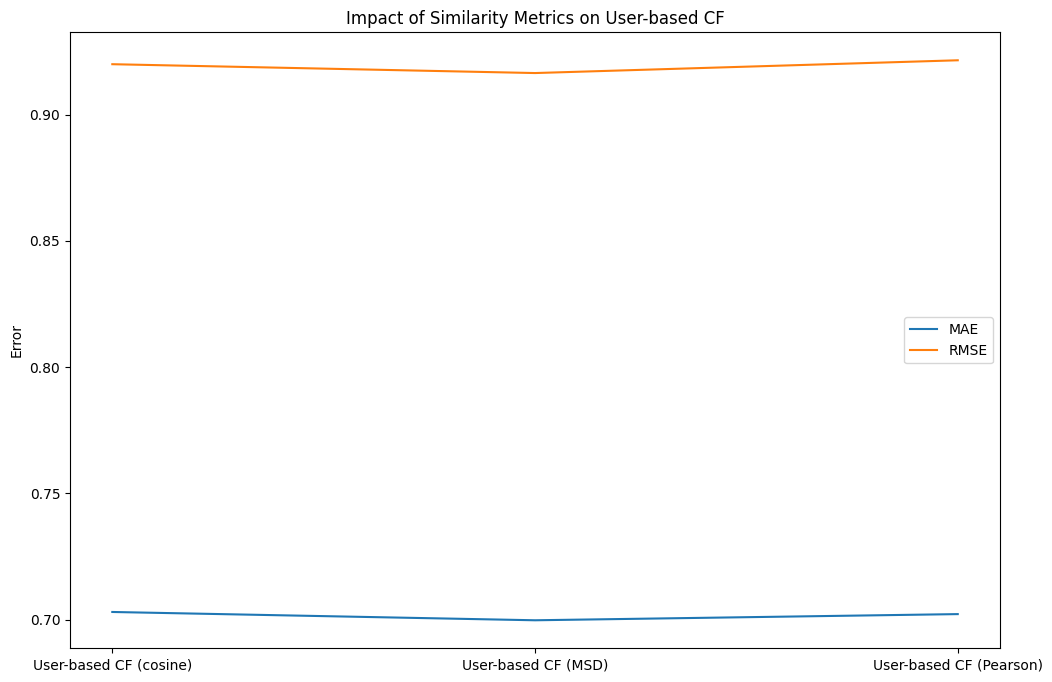

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(['User-based CF (cosine)', 'User-based CF (MSD)', 'User-based CF (Pearson)'], [user_cf_cosine_mae, user_cf_msd_mae, user_cf_pearson_mae], label='MAE')
plt.plot(['User-based CF (cosine)', 'User-based CF (MSD)', 'User-based CF (Pearson)'], [user_cf_cosine_rmse, user_cf_msd_rmse, user_cf_pearson_rmse], label='RMSE')
plt.legend()
plt.title('Impact of Similarity Metrics on User-based CF')
plt.ylabel('Error')
plt.show()

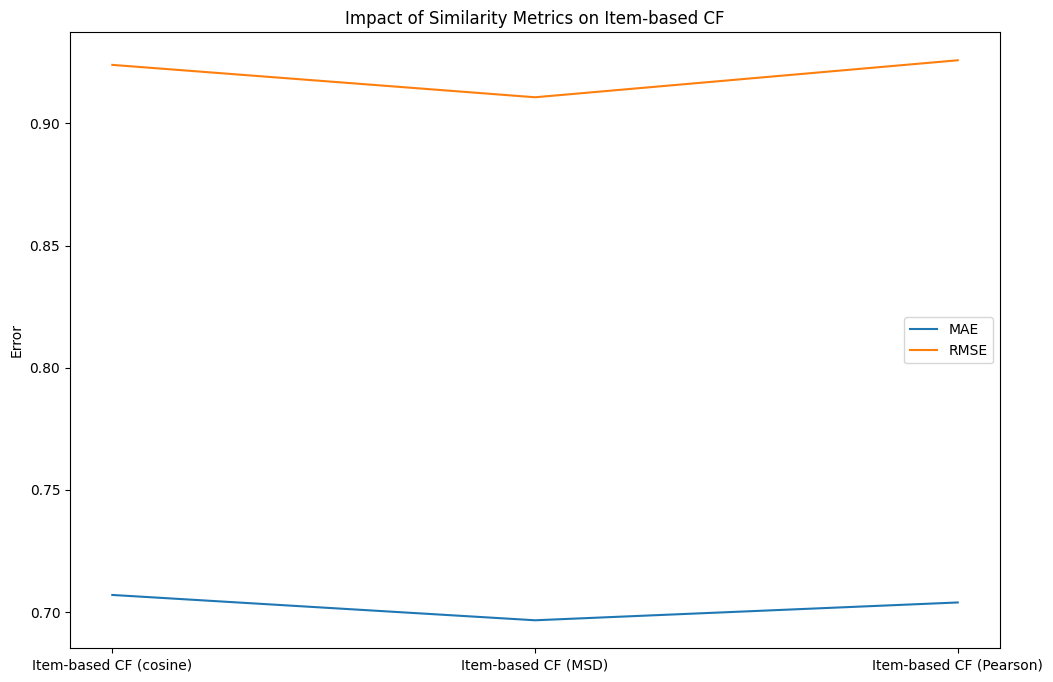

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(['Item-based CF (cosine)', 'Item-based CF (MSD)', 'Item-based CF (Pearson)'], [item_cf_cosine_mae, item_cf_msd_mae, item_cf_pearson_mae], label='MAE')
plt.plot(['Item-based CF (cosine)', 'Item-based CF (MSD)', 'Item-based CF (Pearson)'], [item_cf_cosine_rmse, item_cf_msd_rmse, item_cf_pearson_rmse], label='RMSE')
plt.legend()
plt.title('Impact of Similarity Metrics on Item-based CF')
plt.ylabel('Error')
plt.show()

# Part 3F

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7179
RMSE: 0.9340
User-based CF (k=10): MAE = 0.7179181596318748, RMSE = 0.9340162438025015
Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7074
RMSE: 0.9230
User-based CF (k=20): MAE = 0.7073947100326334, RMSE = 0.9230275703224252
Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7049
RMSE: 0.9211
User-based CF (k=30): MAE = 0.7049340004435742, RMSE = 0.9210906703179508
Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7034
RMSE: 0.9200
User-based CF (k=40): MAE = 0.7033929801026387, RMSE = 0.9199977418131736
Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7030
RMSE: 0.9199
User-based CF (k=50): MAE = 0.7029997003158529, RMSE = 0.9199223060632781


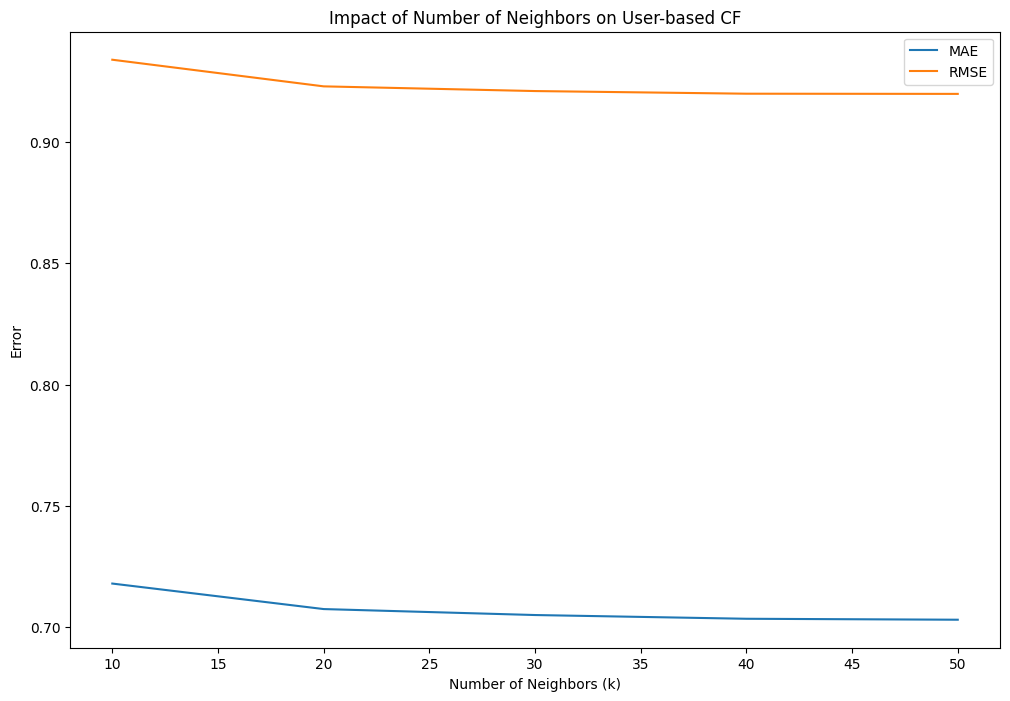

In [21]:
k_values = [10, 20, 30, 40, 50]

mae_values = []
rmse_values = []

for k in k_values:
    user_cf = KNNWithMeans(k=k, sim_options={'name': 'cosine', 'user_based': True, 'verbose': False})
    user_cf.fit(train)
    predictions = user_cf.test(test)
    mae = accuracy.mae(predictions)
    rmse = accuracy.rmse(predictions)
    mae_values.append(mae)
    rmse_values.append(rmse)
    print(f'User-based CF (k={k}): MAE = {mae}, RMSE = {rmse}')

plt.figure(figsize=(12, 8))
plt.plot(k_values, mae_values, label='MAE')
plt.plot(k_values, rmse_values, label='RMSE')
plt.legend()
plt.title('Impact of Number of Neighbors on User-based CF')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.show()

Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7334
RMSE: 0.9563
Item-based CF (k=10): MAE = 0.7333821894439776, RMSE = 0.956288797740597
Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7169
RMSE: 0.9363
Item-based CF (k=20): MAE = 0.7168959569290605, RMSE = 0.9363353971950863
Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7119
RMSE: 0.9301
Item-based CF (k=30): MAE = 0.7119007469029027, RMSE = 0.930133283523573
Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7090
RMSE: 0.9262
Item-based CF (k=40): MAE = 0.7089588907216753, RMSE = 0.9261903484787168
Computing the cosine similarity matrix...
Done computing similarity matrix.
MAE:  0.7070
RMSE: 0.9239
Item-based CF (k=50): MAE = 0.7070235924262248, RMSE = 0.9239192660252195


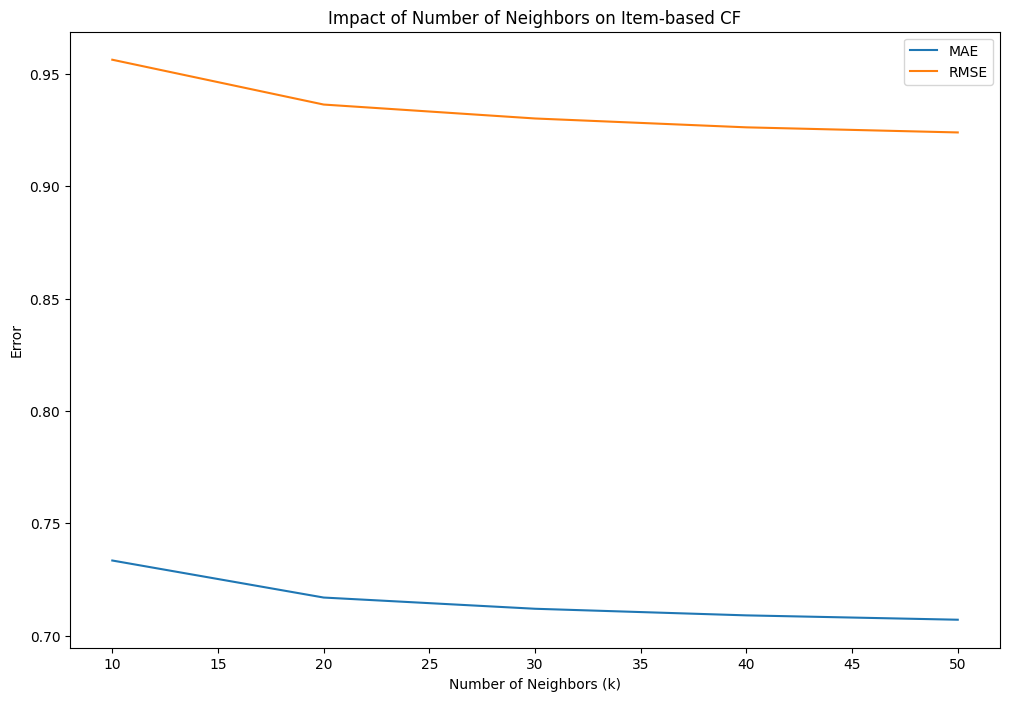

In [22]:
# Finding impact of number of neighbours on item based CF by varying k
rmse_values = []
mae_values = []

for k in k_values:
    item_cf = KNNWithMeans(k=k, sim_options={'name': 'cosine', 'user_based': False, 'verbose': False})
    item_cf.fit(train)
    predictions = item_cf.test(test)
    mae = accuracy.mae(predictions)
    rmse = accuracy.rmse(predictions)
    mae_values.append(mae)
    rmse_values.append(rmse)
    print('Item-based CF (k={}): MAE = {}, RMSE = {}'.format(k, mae, rmse))

plt.figure(figsize=(12, 8))
plt.plot(k_values, mae_values, label='MAE')
plt.plot(k_values, rmse_values, label='RMSE')
plt.legend()
plt.title('Impact of Number of Neighbors on Item-based CF')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.show()

# Part 3G

In [23]:
# Finding best k for user based collaborative filtering
user_cf_rmse = []
for k in range(1, 51):
    user_cf = KNNWithMeans(k=k, sim_options={'name': 'cosine', 'user_based': True, 'verbose': 1})
    user_cf.fit(train)
    predictions = user_cf.test(test)
    rmse = accuracy.rmse(predictions)
    user_cf_rmse.append(rmse)
    print('User-based CF (k={}): RMSE = {}'.format(k, rmse))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1946
User-based CF (k=1): RMSE = 1.1945703591346006
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0527
User-based CF (k=2): RMSE = 1.0526554092868063
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0024
User-based CF (k=3): RMSE = 1.002447277207313
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9769
User-based CF (k=4): RMSE = 0.9769396695689455
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9624
User-based CF (k=5): RMSE = 0.9623632825919225
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9527
User-based CF (k=6): RMSE = 0.9527442755047627
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9453
User-based CF (k=7): RMSE = 0.945341296733769
Computing the cosine similarity matrix...
Done com

In [24]:
# Finding best k for item based collaborative filtering
item_cf_rmse = []
for k in range(1, 51):
    item_cf = KNNWithMeans(k=k, sim_options={'name': 'cosine', 'user_based': False, 'verbose': 1})
    item_cf.fit(train)
    predictions = item_cf.test(test)
    rmse = accuracy.rmse(predictions)
    item_cf_rmse.append(rmse)
    print('Item-based CF (k={}): RMSE = {}'.format(k, rmse))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1950
Item-based CF (k=1): RMSE = 1.194972717298207
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0677
Item-based CF (k=2): RMSE = 1.0676652711376224
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0236
Item-based CF (k=3): RMSE = 1.0236062142825495
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0031
Item-based CF (k=4): RMSE = 1.0030996570335426
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9878
Item-based CF (k=5): RMSE = 0.9877847825485213
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9779
Item-based CF (k=6): RMSE = 0.9778799876368329
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9712
Item-based CF (k=7): RMSE = 0.9712388687749725
Computing the cosine similarity matrix...
Done co

In [25]:
# Finding best k from the array
best_k_user_cf = user_cf_rmse.index(min(user_cf_rmse)) + 1
best_k_item_cf = item_cf_rmse.index(min(item_cf_rmse)) + 1
print(f'Best number of neighbors for User-based CF: k = {best_k_user_cf}')
print(f'Best number of neighbors for Item-based CF: k = {best_k_item_cf}')

Best number of neighbors for User-based CF: k = 46
Best number of neighbors for Item-based CF: k = 50
